# Otoczka wypukła

In [113]:
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import math
import numpy as np

### Point

In [114]:
class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y

    def draw(self, color: str):
        plt.scatter(self.x, self.y, color=color)  # plotting single point

    def print(self):
        print(self.x,self.y)

    def moveByVector(self, v):
        self.x+=v[0]
        self.y+=v[1]


### Klasa Line

In [115]:
class Line:
    def __init__(self, head: Point, tail: Point):
        self.head = head
        self.tail = tail
        self.calculateFunction()
    
    def length(self):
        return math.sqrt(math.pow(self.head.x-self.tail.x,2)+math.pow(self.head.y-self.tail.y,2))

    def calculateFunction(self):
        if (self.head.x-self.tail.x) != 0:
            self.a = (self.head.y - self.tail.y)/(self.head.x-self.tail.x)
            self.b = self.head.y - self.a * self.head.x
        else:
            self.a = None
            self.b = self.head.x

    def draw(self, color):
        plt.plot([self.head.x,self.tail.x], [self.head.y,self.tail.y], linestyle="-", color = color)

    def angleToVector(self, v):
        xL = self.head.x
        xR = self.tail.x
        x = xR - xL

        yL = self.head.y
        yR = self.tail.y
        y = yR - yL
        if x == 0 and y == 0:
            return 0
        cosA = (x*v[0]+y*v[1])/((math.sqrt(math.pow(x,2)+math.pow(y,2))))
        angle = math.acos(cosA)*180/math.pi
        if v[0] > 0 and y < 0:
            angle+=180
        if v[0] < 0 and y > 0:
            angle+=180
        return angle
        
    def vector(self):
        return [self.tail.x-self.head.x,self.tail.y-self.head.y]
    
    def distance(self):
        return math.sqrt(math.pow(self.vector()[0],2)+math.pow(self.vector()[1],2))

### Algorytm Jarvisa

In [116]:
def smallestAnglePoint(points, P, v):
    j=0
    angle = 360
    newPoint = points[0]
    for p in points:
        if p.x != P.x and p.y != P.y:
            newAngle = Line(P,p).angleToVector(v)
            if angle >= newAngle:
                angle = newAngle 
                newPoint = p
    return newPoint

def Jarvis(points):
    points.sort(key=lambda p: p.x)
    points.sort(key=lambda p: p.y)

    convexHull = []
    P = []
    Q = []
    P.append(points[0])
    Q.append(points[len(points)-1])

    for i in points:
        i.draw("b")

    while P[-1] != Q[0]:
        S = P[-1]
        N = smallestAnglePoint(points, S, [1,0])
        Line(P[-1],N).draw("b")
        P.append(N)
        points.remove(N)
        convexHull.append(N)
        
    while Q[-1] != P[0]:
        S = Q[-1]
        N = smallestAnglePoint(points, S, [-1,0])
        Line(Q[-1],N).draw("r")
        Q.append(N)
        points.remove(N)
        convexHull.append(N)

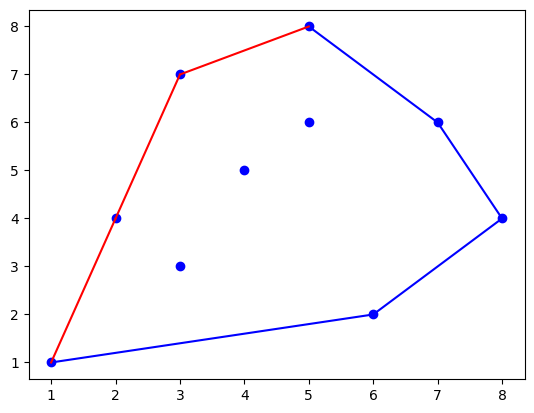

In [117]:
filePoints = np.genfromtxt("points.txt", delimiter=" ", usemask=True)
points = []
for p in filePoints:
    points.append(Point(p[0],p[1]))
Jarvis(points)

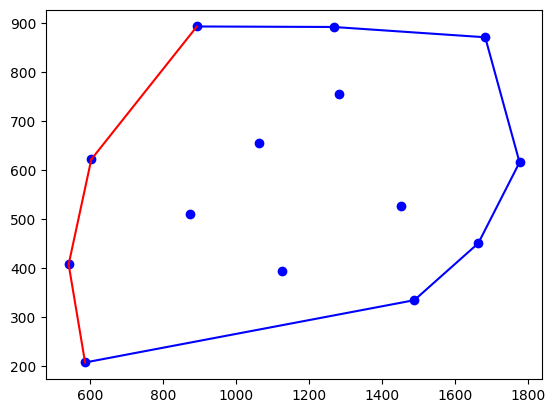

In [118]:
filePoints = np.genfromtxt("points2.txt", delimiter=" ", usemask=True)
points2 = []
for p in filePoints:
    points2.append(Point(p[0],p[1]))
Jarvis(points2)

### Algorytm Grahama

In [119]:
def insideTriangle(A,B,C):
    AC = [C.x-A.x,C.y-A.y]
    AB = [B.x-A.x,B.y-A.y]
    v = AC[0]*AB[1]-AB[0]*AC[1]
    if v < 0:
        return False
    else:
        return True

def Graham(points):
    points.sort(key=lambda p: p.x)
    points.sort(key=lambda p: p.y)

    sortedPoints = []
    O = Point(0,0)
    v = Line(points[0],O).vector()

    for p in points:
        p.moveByVector(v)

    S = points[0]

    for p in points:
        l = Line(O,p)
        sortedPoints.append([p,l.distance(),l.angleToVector([1,0])])

    sortedPoints.sort(key=lambda x: x[1])
    sortedPoints.sort(key=lambda x: x[2])
    
    O.draw("b")
    for i in points:
        i.draw("b")
    i = 0
    while i < 8 and i+3 < len(sortedPoints):
        if insideTriangle(sortedPoints[i+1][0],sortedPoints[i+2][0],sortedPoints[i+3][0]):
            sortedPoints.remove(sortedPoints[i+2])
            if i>0:
                i-=1
        else:
            Line(sortedPoints[i][0], sortedPoints[i+1][0]).draw("k")
            i+=1
        
    Line(sortedPoints[0][0], sortedPoints[-1][0]).draw("k")  
    Line(sortedPoints[-1][0], sortedPoints[-2][0]).draw("k")   
    Line(sortedPoints[-2][0], sortedPoints[-3][0]).draw("k")   


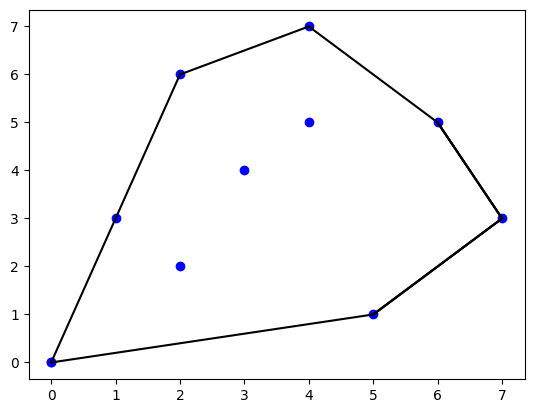

In [120]:
filePoints = np.genfromtxt("points.txt", delimiter=" ", usemask=True)
points = []
for p in filePoints:
    points.append(Point(p[0],p[1]))
Graham(points)

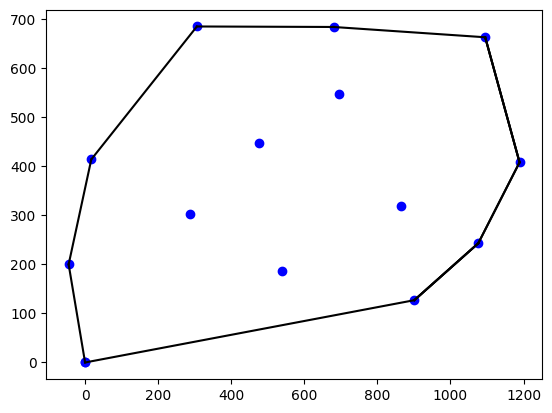

In [121]:
filePoints = np.genfromtxt("points2.txt", delimiter=" ", usemask=True)
points2 = []
for p in filePoints:
    points2.append(Point(p[0],p[1]))
Graham(points2)